In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
#add data
movie_gross_df = pd.read_csv('../../data/bom.movie_gross.csv.gz')
movie_info_df = pd.read_csv('../../data/rt.movie_info.tsv.gz', sep='\t')
reviews_df = pd.read_csv('../../data/rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')
movies_df = pd.read_csv('../../data/tmdb.movies.csv.gz', encoding='latin1')
movie_budgets_df = pd.read_csv('../../data/tn.movie_budgets.csv.gz', encoding='latin1')

In [3]:
#rename dfs to connect on the unique ID movie
movies_df = movies_df.rename(columns={'original_title': 'movie'})
movie_gross_df = movie_gross_df.rename(columns={'title': 'movie'})

In [4]:
#connect moviegross and moviebudgets on movie
gross_budgets = pd.merge(movie_gross_df, movie_budgets_df, on=['movie'])

In [5]:
# Clean the worldwide_gross column
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].astype(float)

# Clean the production_budget column
gross_budgets['production_budget'] = gross_budgets['production_budget'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
gross_budgets['production_budget'] = gross_budgets['production_budget'].astype(float)

In [6]:
# Clean the worldwide_gross column
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(float)

# Clean the production_budget column
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '')

# Convert the column to float
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(float)

In [7]:
#create profit
movie_budgets_df['profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
#represented in millions
movie_budgets_df['profit'] = movie_budgets_df['profit'] / 1000000

In [8]:
#create profit
gross_budgets['profit'] = gross_budgets['worldwide_gross'] - gross_budgets['production_budget']
#represented in millions
gross_budgets['profit'] = gross_budgets['profit'] / 1000000

In [9]:
#stat info on profit
profit_stats = movie_budgets_df['profit'].describe()
print(profit_stats)

count    5782.000000
mean       59.899704
std       146.088881
min      -200.237650
25%        -2.189071
50%         8.550286
75%        60.968502
max      2351.345279
Name: profit, dtype: float64


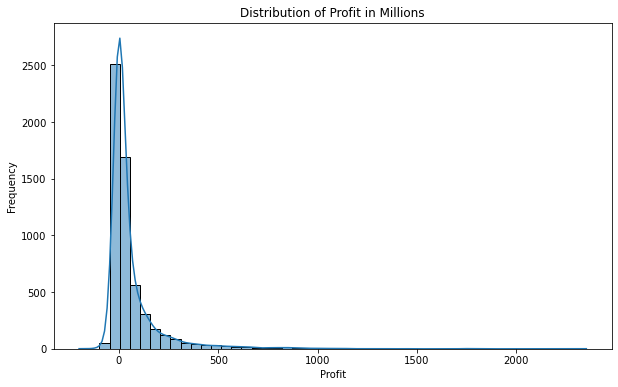

In [10]:
# Draw a histogram for profit
plt.figure(figsize=(10, 6))
sns.histplot(data=movie_budgets_df, x='profit', kde=True, bins = 50)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit in Millions')
plt.show()

In [11]:
rating_stats = movie_info_df['rating'].describe()
print(rating_stats)

count     1557
unique       6
top          R
freq       521
Name: rating, dtype: object


In [12]:
movie_info_df['rating'].unique()

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [13]:
rating_counts = movie_info_df['rating'].value_counts()
print(rating_counts)

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64


In [23]:
import scipy.stats as stats
import numpy as np

#assign variables for margin of error math
confidence_level = 0.95
sample_size = len(gross_budgets['profit'])

mean_profit = np.mean(gross_budgets['profit'])
std_dev = np.std(gross_budgets['profit'])
std_error = stats.sem(gross_budgets['profit'])

#margin of error calulation based on the math
margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, sample_size - 1)

lower_bound = round(mean_profit - margin_of_error,2)
upper_bound = round(mean_profit + margin_of_error,2)

print(f"The {confidence_level * 100}% confidence interval movie profits represented in millions is: ({lower_bound}, {upper_bound})")

The 95.0% confidence interval movie profits represented in millions is: (94.33, 115.93)


In [15]:
#Null Hypothesis: There is no relationship between A and B
#profit has no relationship to any of the top 3 occuring studios

#Alternative Hypothesis: The hypothesis traditionally thought of when creating a hypothesis for an experiment
#profit has a relationship to all or some of the top 3 occuring studios


In [16]:
studio_list = gross_budgets['studio'].unique()
studio_list

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'FoxS',
       'SGem', 'WB (NL)', 'LGF', 'MBox', 'W/Dim.', 'Focus', 'MGM',
       'Over.', 'Mira.', 'NM', 'CBS', 'SPC', 'ParV', 'Gold.', 'RAtt.',
       'Magn.', 'IFC', 'Free', '3D', 'Wein.', 'Rela.', 'Anch.', 'App.',
       'Drft.', 'IW', 'Relbig.', 'Viv.', 'Eros', 'Scre.', 'UTV', 'Kino',
       'ATO', 'First', 'GK', 'NFC', 'Strand', 'Mont.', 'IVP', 'FD',
       'TriS', 'ORF', 'Jan.', 'Osci.', 'OMNI/FSR', nan, 'SMod', 'WHE',
       'P4', 'ALP', 'LG/S', 'RTWC', 'MNE', 'LD', 'Yash', 'IM', 'A24',
       'PH', 'EOne', 'ELS', 'CE', 'Saban', 'DR', 'Trib.', 'KE', 'VE',
       'EC', 'BG', 'PFR', 'BST', 'BH Tilt', 'BSC', 'FCW', 'Cohen', 'LGP',
       'TFA', 'Alc', 'STX', 'Orch.', 'PNT', 'CJ', 'Cleopatra', 'BBC',
       'GrtIndia', 'Neon', 'Affirm', 'ENTMP', 'Studio 8', 'Annapurna',
       'Global Road', 'Amazon', 'RLJ'], dtype=object)

In [17]:
studio_counts = gross_budgets['studio'].value_counts()
print(studio_counts)

Uni.      117
Fox       110
WB        102
Sony       74
Par.       74
         ... 
Amazon      1
NFC         1
Saban       1
PH          1
ELS         1
Name: studio, Length: 99, dtype: int64


In [18]:
#other studios to test
#check to see if having uni
studio_a = gross_budgets[gross_budgets['studio'] == 'Uni.']['profit']

t_statistic, p_value = stats.ttest_1samp(studio_a, popmean=0)

p_value = round(p_value,2)

print("p-value for uni and profit:", p_value)

p-value for uni and profit: 0.0


In [19]:
studio_counts = {}
studio_list = gross_budgets['studio'].unique()

for studio in studio_list:
    #count studios
    count = len(gross_budgets[gross_budgets['studio'] == studio])
    studio_counts[studio] = count

# Sort the dictionary by values (occurrence count) in descending order
sorted_studios = sorted(studio_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 3 studio occurances in the dataset significance with profit:")
#grab the top 10
for studio, count in sorted_studios[:3]:
    #create var for pvalue with respect to studio and profit
    studio_profit = gross_budgets[gross_budgets['studio'] == studio]['profit']
    #pvalue test
    t_statistic, p_value = stats.ttest_1samp(studio_profit, popmean=0)
    if not np.isnan(p_value):  # Check if p-value is not null
        print(f"{studio}: {round(p_value, 2)}")

Top 3 studio occurances in the dataset significance with profit:
Uni.: 0.0
Fox: 0.0
WB: 0.0


In [20]:
#based on this we reject the null and accept the alternative that any of the top 3 occuring studios will help with profit

In [22]:
# Create a new dataframe with production budgets under 10 million
production_budget_under_10m = gross_budgets[gross_budgets['production_budget'] < 10000000]

confidence_level = 0.95
sample_size = len(production_budget_under_10m['profit'])

mean_profit = np.mean(production_budget_under_10m['profit'])
std_dev = np.std(production_budget_under_10m['profit'])
std_error = stats.sem(production_budget_under_10m['profit'])

margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, sample_size - 1)

lower_bound_low10 = round(mean_profit - margin_of_error, 2)
upper_bound_low10 = round(mean_profit + margin_of_error, 2)

print(f"The {confidence_level * 100}% confidence interval for movie budgets under 10 million represented in millions is: ({lower_bound_low10}, {upper_bound_low10})")

The 95.0% confidence interval for movie budgets under 10 million represented in millions is: (15.59, 26.02)


In [24]:
# Create a new dataframe with production budgets under 10 million
production_budget_over_10m = gross_budgets[gross_budgets['production_budget'] >= 10000000]
confidence_level = 0.95
sample_size = len(production_budget_over_10m['profit'])

mean_profit = np.mean(production_budget_over_10m['profit'])
std_dev = np.std(production_budget_over_10m['profit'])
std_error = stats.sem(production_budget_over_10m['profit'])

margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, sample_size - 1)

lower_bound_up10 = round(mean_profit - margin_of_error, 2)
upper_bound_up10 = round(mean_profit + margin_of_error, 2)

print(f"The {confidence_level * 100}% confidence interval for movie budgets under 10 million represented in millions is: ({lower_bound_up10}, {upper_bound_up10})")

The 95.0% confidence interval for movie budgets under 10 million represented in millions is: (115.68, 142.52)
